# Clustering:

# The ads24x7 is a Digital Marketing company which has now got seed funding of 10 Million dollar. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

## 1. Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('Clustering Clean Ads_Data.xlsx')

In [3]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [7]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [8]:
df.duplicated().sum()

0

In [33]:
cust_df = df.drop(['Timestamp','InventoryType', 'Platform', 'Device Type', 'Format', 'Ad Type', 'Ad - Length', 'Ad- Width', 'Ad Size'], axis=1)

In [34]:
cust_df.head()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.512407,-0.515248,-0.510918,-0.615311,-0.665372,0.465447,-0.619693,-0.747206,-0.927054,-0.986615
1,-0.512413,-0.515264,-0.510933,-0.615311,-0.665372,0.465447,-0.619693,-0.747045,-0.927054,-0.986615
2,-0.512213,-0.515235,-0.510905,-0.615311,-0.665372,0.465447,-0.619693,-0.750919,-0.927054,-0.986615
3,-0.512276,-0.515179,-0.510847,-0.615311,-0.665372,0.465447,-0.619693,-0.750029,-0.927054,-0.986615
4,-0.512531,-0.515281,-0.510951,-0.615311,-0.665372,0.465447,-0.619693,-0.741898,-0.927054,-0.986615


# Treat missing values in CPC, CTR and CPM using the formula given.

#### CPM = (Total Campaign Spend / Number of Impressions) * 1,000.

#### CPC = Total Cost (spend) / Number of Clicks

#### CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

In [35]:
def calculate_CPC(x):
   Total_Cost = df.Spend
   Number_of_Clicks= df.Clicks
   CPC = (Total_Cost/Number_of_Clicks)

   return CPC
df['CPC'] = df[['CPC']].apply(lambda x: calculate_CPC(x))

In [36]:
def calculate_CTR(x):
   Total_Measured_Clicks = df.Clicks
   Total_Measured_Ad_Impressions= df.Available_Impressions
   CTR = (Total_Measured_Clicks/(Total_Measured_Ad_Impressions)*100)

   return CTR
df['CTR'] = df[['CTR']].apply(lambda x: calculate_CTR(x))

In [37]:
def calculate_CPM(x):
   Total_Campaign_Spend = df.Spend
   Number_of_Impressions= df.Impressions
   CPM = (Total_Campaign_Spend/(Number_of_Impressions)*1000)

   return CPM
df['CPM'] = df[['CPM']].apply(lambda x: calculate_CPM(x))

In [38]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [39]:
from scipy import stats

In [40]:
df['Available_Impressions'] = stats.zscore(df['Available_Impressions'])
df['Matched_Queries'] = stats.zscore(df['Matched_Queries'])
df['Impressions'] = stats.zscore(df['Impressions'])
df['Clicks'] = stats.zscore(df['Clicks'])
df['Spend'] = stats.zscore(df['Spend'])
df['Fee'] = stats.zscore(df['Fee'])
df['Revenue'] = stats.zscore(df['Revenue'])
df['CTR'] = stats.zscore(df['CTR'])
df['CPM'] = stats.zscore(df['CPM'])
df['CPC'] = stats.zscore(df['CPC'])

In [41]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,-0.512407,-0.515248,-0.510918,-0.615311,-0.665372,0.465447,-0.619693,0.034031,0.052538,0.002905
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,-0.512413,-0.515264,-0.510933,-0.615311,-0.665372,0.465447,-0.619693,0.034031,0.052535,0.002905
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,-0.512213,-0.515235,-0.510905,-0.615311,-0.665372,0.465447,-0.619693,0.034039,0.052541,0.002905
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,-0.512276,-0.515179,-0.510847,-0.615311,-0.665372,0.465447,-0.619693,0.034037,0.052553,0.002905
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,-0.512531,-0.515281,-0.510951,-0.615311,-0.665372,0.465447,-0.619693,0.034026,0.052531,0.002905


## Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

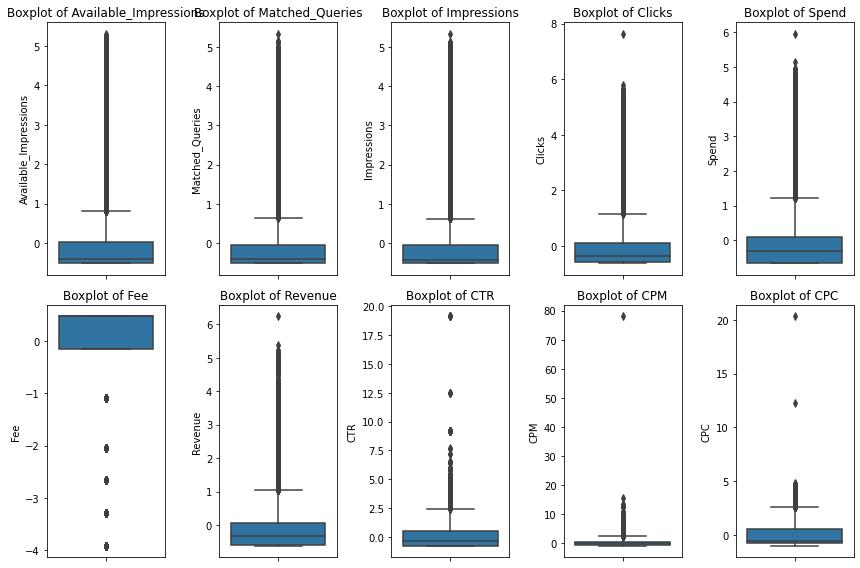

In [42]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = cust_df.columns
for i in range(len(feature_list)):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y = cust_df[feature_list[i]], data = cust_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [43]:
## Scaling the data using the ZScore Scaling function

from scipy.stats import zscore

#apply the scaler to the data:
df_scaled =  cust_df.apply(zscore)
df_scaled.head()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.512407,-0.515248,-0.510918,-0.615311,-0.665372,0.465447,-0.619693,-0.747206,-0.927054,-0.986615
1,-0.512413,-0.515264,-0.510933,-0.615311,-0.665372,0.465447,-0.619693,-0.747045,-0.927054,-0.986615
2,-0.512213,-0.515235,-0.510905,-0.615311,-0.665372,0.465447,-0.619693,-0.750919,-0.927054,-0.986615
3,-0.512276,-0.515179,-0.510847,-0.615311,-0.665372,0.465447,-0.619693,-0.750029,-0.927054,-0.986615
4,-0.512531,-0.515281,-0.510951,-0.615311,-0.665372,0.465447,-0.619693,-0.741898,-0.927054,-0.986615


In [44]:
## Scaling the data using the StandardScaler function

from sklearn.preprocessing import StandardScaler
X = StandardScaler()

#assign scaler to column:
df_scaled =  X.fit_transform(cust_df)
df_scaled = pd.DataFrame(df_scaled,columns=cust_df.columns)
df_scaled.head()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.512407,-0.515248,-0.510918,-0.615311,-0.665372,0.465447,-0.619693,-0.747206,-0.927054,-0.986615
1,-0.512413,-0.515264,-0.510933,-0.615311,-0.665372,0.465447,-0.619693,-0.747045,-0.927054,-0.986615
2,-0.512213,-0.515235,-0.510905,-0.615311,-0.665372,0.465447,-0.619693,-0.750919,-0.927054,-0.986615
3,-0.512276,-0.515179,-0.510847,-0.615311,-0.665372,0.465447,-0.619693,-0.750029,-0.927054,-0.986615
4,-0.512531,-0.515281,-0.510951,-0.615311,-0.665372,0.465447,-0.619693,-0.741898,-0.927054,-0.986615


## Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

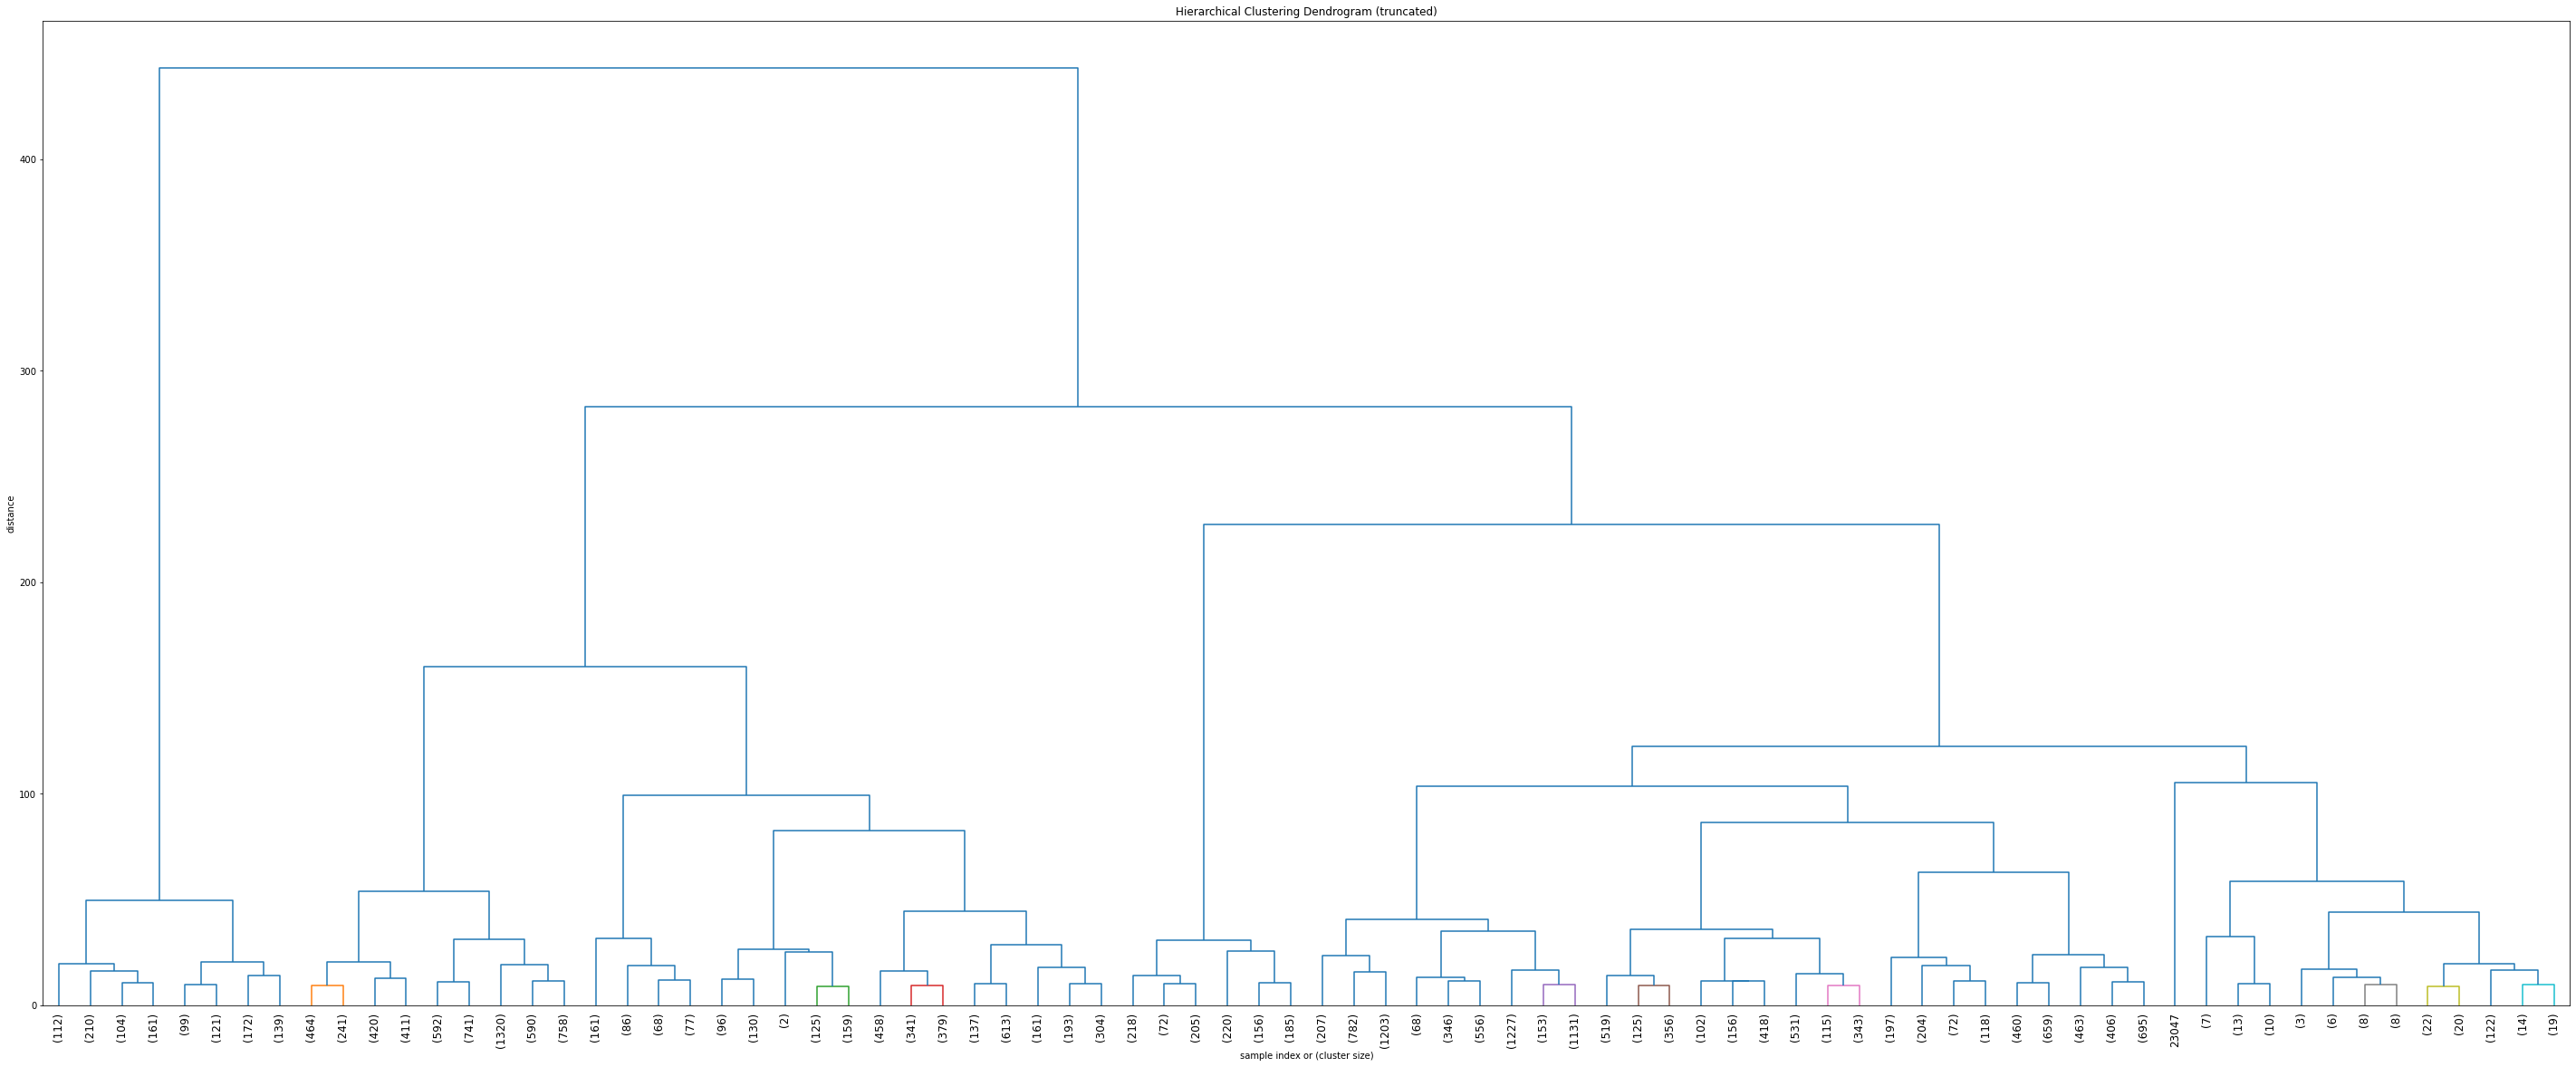

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50,20))
Z_Final = linkage(df_scaled, 'ward' , metric= 'euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

## Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [46]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i , random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [47]:
for i in range(2,11):
    print('The WSS value for',i,'clusters is' ,wcss[i-2])

The WSS value for 2 clusters is 124206.55197218123
The WSS value for 3 clusters is 87167.06509343411
The WSS value for 4 clusters is 59284.16364608743
The WSS value for 5 clusters is 49124.52734075723
The WSS value for 6 clusters is 41537.70621096232
The WSS value for 7 clusters is 35673.825643574455
The WSS value for 8 clusters is 31357.115216014816
The WSS value for 9 clusters is 27914.22818329789
The WSS value for 10 clusters is 24619.217643071453


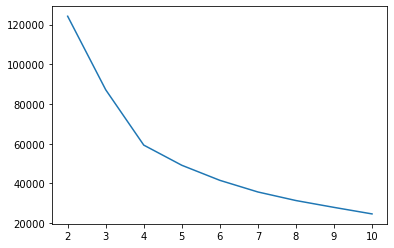

In [49]:
plt.plot(range(2,11), wcss)

###### The optimum number of clusters are 2

## Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [55]:
k_means.labels_

NameError: name 'k_means' is not defined

###### KMeans with K=3 : the silhouette score

In [56]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels =k_means.labels_

In [57]:
# Calculating silhouette_score

silhouette_score(df_scaled,labels)

0.4139099650382887

###### KMeans with K=2 :the silhouette score

In [58]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_scaled)
labels =k_means.labels_

In [59]:
# Calculating silhouette_score

silhouette_score(df_scaled,labels)

0.6941205569836135

###### KMeans with K=4 :the silhouette score

In [60]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
labels =k_means.labels_

In [61]:
# Calculating silhouette_score

silhouette_score(df_scaled,labels)

0.48184055395981845

###### KMeans with K=5 :the silhouette score

In [62]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df_scaled)
labels =k_means.labels_

In [63]:
# Calculating silhouette_score

silhouette_score(df_scaled,labels)

0.44459260442922904

###### KMeans with K=6 :the silhouette score

In [64]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df_scaled)
labels =k_means.labels_

In [65]:
# Calculating silhouette_score

silhouette_score(df_scaled,labels)

0.45446664169743556

###### KMeans with K=7 :the silhouette score

In [66]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(df_scaled)
labels =k_means.labels_

In [67]:
# Calculating silhouette_score

silhouette_score(df_scaled,labels)

0.41713583217140165

###### KMeans with K=8 :the silhouette score

In [68]:
k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(df_scaled)
labels =k_means.labels_

In [69]:
# Calculating silhouette_score

silhouette_score(df_scaled,labels)

0.4121262695067735

###### KMeans with K=9 :the silhouette score

In [70]:
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(df_scaled)
labels =k_means.labels_

In [71]:
# Calculating silhouette_score

silhouette_score(df_scaled,labels)

0.4392149003072143

###### KMeans with K=10 :the silhouette score

In [72]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(df_scaled)
labels =k_means.labels_

In [73]:
# Calculating silhouette_score

silhouette_score(df_scaled,labels)

0.4592482902970617

In [74]:
k_means.labels_

array([0, 0, 0, ..., 8, 5, 8])

#####  silhouette score when the number of clusters are 2 is the Highest

## Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [75]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_scaled)
labels = k_means.labels_

In [76]:
df["Clus_kmeans2"] = labels
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans2
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,-0.512407,-0.515248,-0.510918,-0.615311,-0.665372,0.465447,-0.619693,0.034031,0.052538,0.002905,1
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,-0.512413,-0.515264,-0.510933,-0.615311,-0.665372,0.465447,-0.619693,0.034031,0.052535,0.002905,1
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,-0.512213,-0.515235,-0.510905,-0.615311,-0.665372,0.465447,-0.619693,0.034039,0.052541,0.002905,1
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,-0.512276,-0.515179,-0.510847,-0.615311,-0.665372,0.465447,-0.619693,0.034037,0.052553,0.002905,1
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,-0.512531,-0.515281,-0.510951,-0.615311,-0.665372,0.465447,-0.619693,0.034026,0.052531,0.002905,1


In [77]:
df.Clus_kmeans2.value_counts().sort_index()

0     1467
1    21599
Name: Clus_kmeans2, dtype: int64

In [78]:
clust_profile=df.drop(['Available_Impressions','Impressions', 'Fee'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans2').mean()
clust_profile['freq']=df.Clus_kmeans2.value_counts().sort_index()
clust_profile

,Ad - Length,Ad- Width,Ad Size,Matched_Queries,Clicks,Spend,Revenue,CTR,CPM,CPC,freq
Clus_kmeans2,,,,,,,,,,,
0,682.126789,117.627812,70182.331288,3.368242,0.412391,3.193737,3.252178,0.014033,0.025197,-0.054516,1467
1,364.993379,352.856614,98473.808973,-0.228770,-0.028010,-0.216918,-0.220887,-0.000953,-0.001711,0.003703,21599


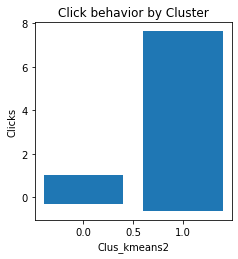

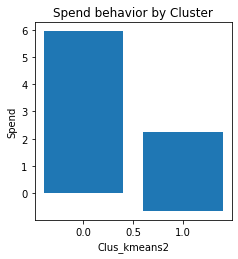

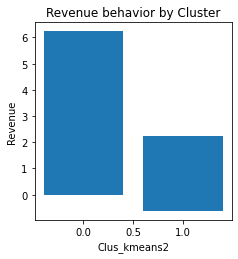

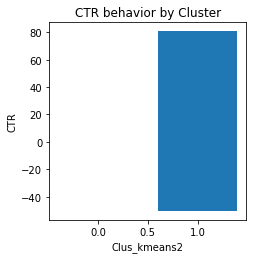

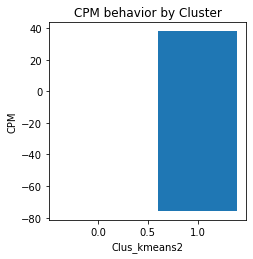

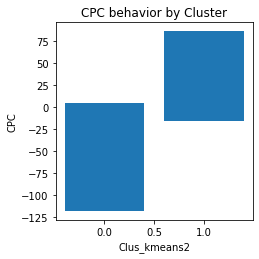

In [79]:
plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.bar(df['Clus_kmeans2'], df['Clicks'])
plt.xlabel('Clus_kmeans2')
plt.ylabel('Clicks')
plt.title('Click behavior by Cluster')

plt.figure(figsize = (12,8))
plt.subplot(2,3,2)
plt.bar(df['Clus_kmeans2'], df['Spend'])
plt.xlabel('Clus_kmeans2')
plt.ylabel('Spend')
plt.title('Spend behavior by Cluster')

plt.figure(figsize = (12,8))
plt.subplot(2,3,3)
plt.bar(df['Clus_kmeans2'], df['Revenue'])
plt.xlabel('Clus_kmeans2')
plt.ylabel('Revenue')
plt.title('Revenue behavior by Cluster')

plt.figure(figsize = (12,8))
plt.subplot(2,3,4)
plt.bar(df['Clus_kmeans2'], df['CTR'])
plt.xlabel('Clus_kmeans2')
plt.ylabel('CTR')
plt.title('CTR behavior by Cluster')

plt.figure(figsize = (12,8))
plt.subplot(2,3,5)
plt.bar(df['Clus_kmeans2'], df['CPM'])
plt.xlabel('Clus_kmeans2')
plt.ylabel('CPM')
plt.title('CPM behavior by Cluster')

plt.figure(figsize = (12,8))
plt.subplot(2,3,6)
plt.bar(df['Clus_kmeans2'], df['CPC'])
plt.xlabel('Clus_kmeans2')
plt.ylabel('CPC')
plt.title('CPC behavior by Cluster')

plt.show()

## Conclude the project by providing summary of your learnings.

1.Based on the above analysis, it seems that k = 2 is the optimum number of clusters for this dataset

2.The code above performs basic data analysis, imputes missing values, treats outliers, and then scales the data using z-score 
scaling. 

3.It then runs the K-Means algorithm with k values ranging from 2-10.

4.For each k value, it calculates the silhouette score to determine which k value results in the best clustering.

5.Based on the above analysis, it seems that k = 2 is the optimum number of clusters for this dataset. 

6.This can be seen from the elbow plot and the silhouette scores. 

7.The code then profiles the ads based on the optimum number of clusters.

# PCA

# PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.

The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels import multivariate
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer import FactorAnalyzer

# Conclude the project by providing summary of your learnings.

1.From the above dataset, Find the highest & lowest ratio of State & District.

2.The code above performs basic data analysis, imputes missing values, treats outliers, and then scales the data using z-score scaling.

3.By Covariance Matrix Get eigen values and eigen vector.

4.Find optimum number of PCs and show scree plot.


# Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [82]:
df1=pd.read_excel('PCA India Data_Census.xlsx')

In [83]:
df1.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [85]:
df1.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [86]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [87]:
#Check for presence of duplicate rows
df1.duplicated().sum()

0

In [88]:
df_pca = df1.drop(['State Code','Dist.Code','State','Area Name'], axis=1)

In [89]:
df_pca

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3333,8154,11781,1146,1203,21,30,0,0,6916,...,32,47,0,0,0,0,0,0,32,47
636,10612,12346,21691,1544,1533,2234,4155,0,0,10292,...,155,337,3,14,38,130,4,23,110,170
637,1275,1549,2630,227,225,0,0,1012,1750,1187,...,104,134,9,4,2,6,17,47,76,77
638,3762,5200,8012,723,664,0,0,28,50,4206,...,136,172,24,44,11,21,1,4,100,103


## Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

<AxesSubplot:>

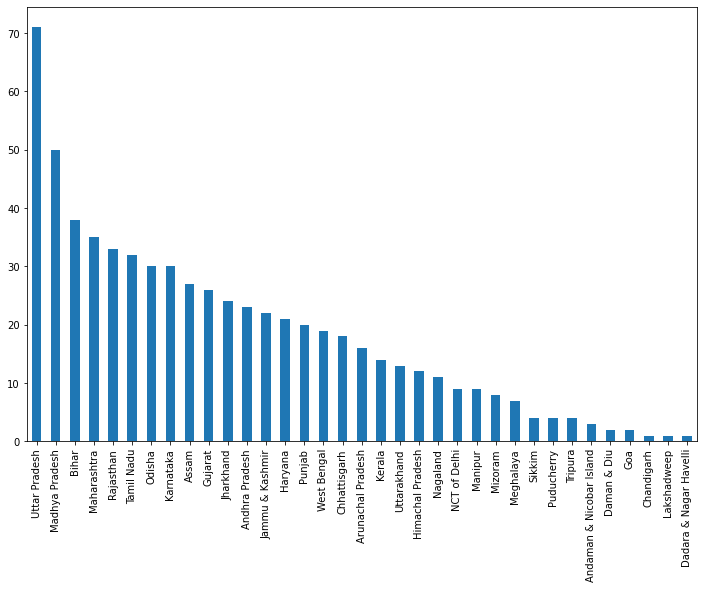

In [90]:
plt.figure(figsize = (12,8))
df1['State'].value_counts().plot(kind = 'bar')

In [91]:
sorted_df1 = df1_averages.sort_values(by='Gender_ratio')
print(sorted_df2)

NameError: name 'df1_averages' is not defined

In [ ]:
sorted_df2 = df2_sum.sort_values(by ='M_LIT')
print(sorted_df2)


The highest gender ratio was found in the state of Kerala.

The lowest gender ratio was found in the state of Haryana.

The highest gender ratio was found in the district of Ernakulam. 

The lowest gender ratio was found in the district of Fatehabad.

## We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

###### Treating outliers is not necessary in this case because if WE remove the outliers it may lead to high bias. so, let PCA handles the outliers by itself

## Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [92]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [93]:
#Check the data post scaling
df_pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


Before z scale

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbba0876a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbba097670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbba0760d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1bbba0a80d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bbba0b86a0>,
 'means': []}

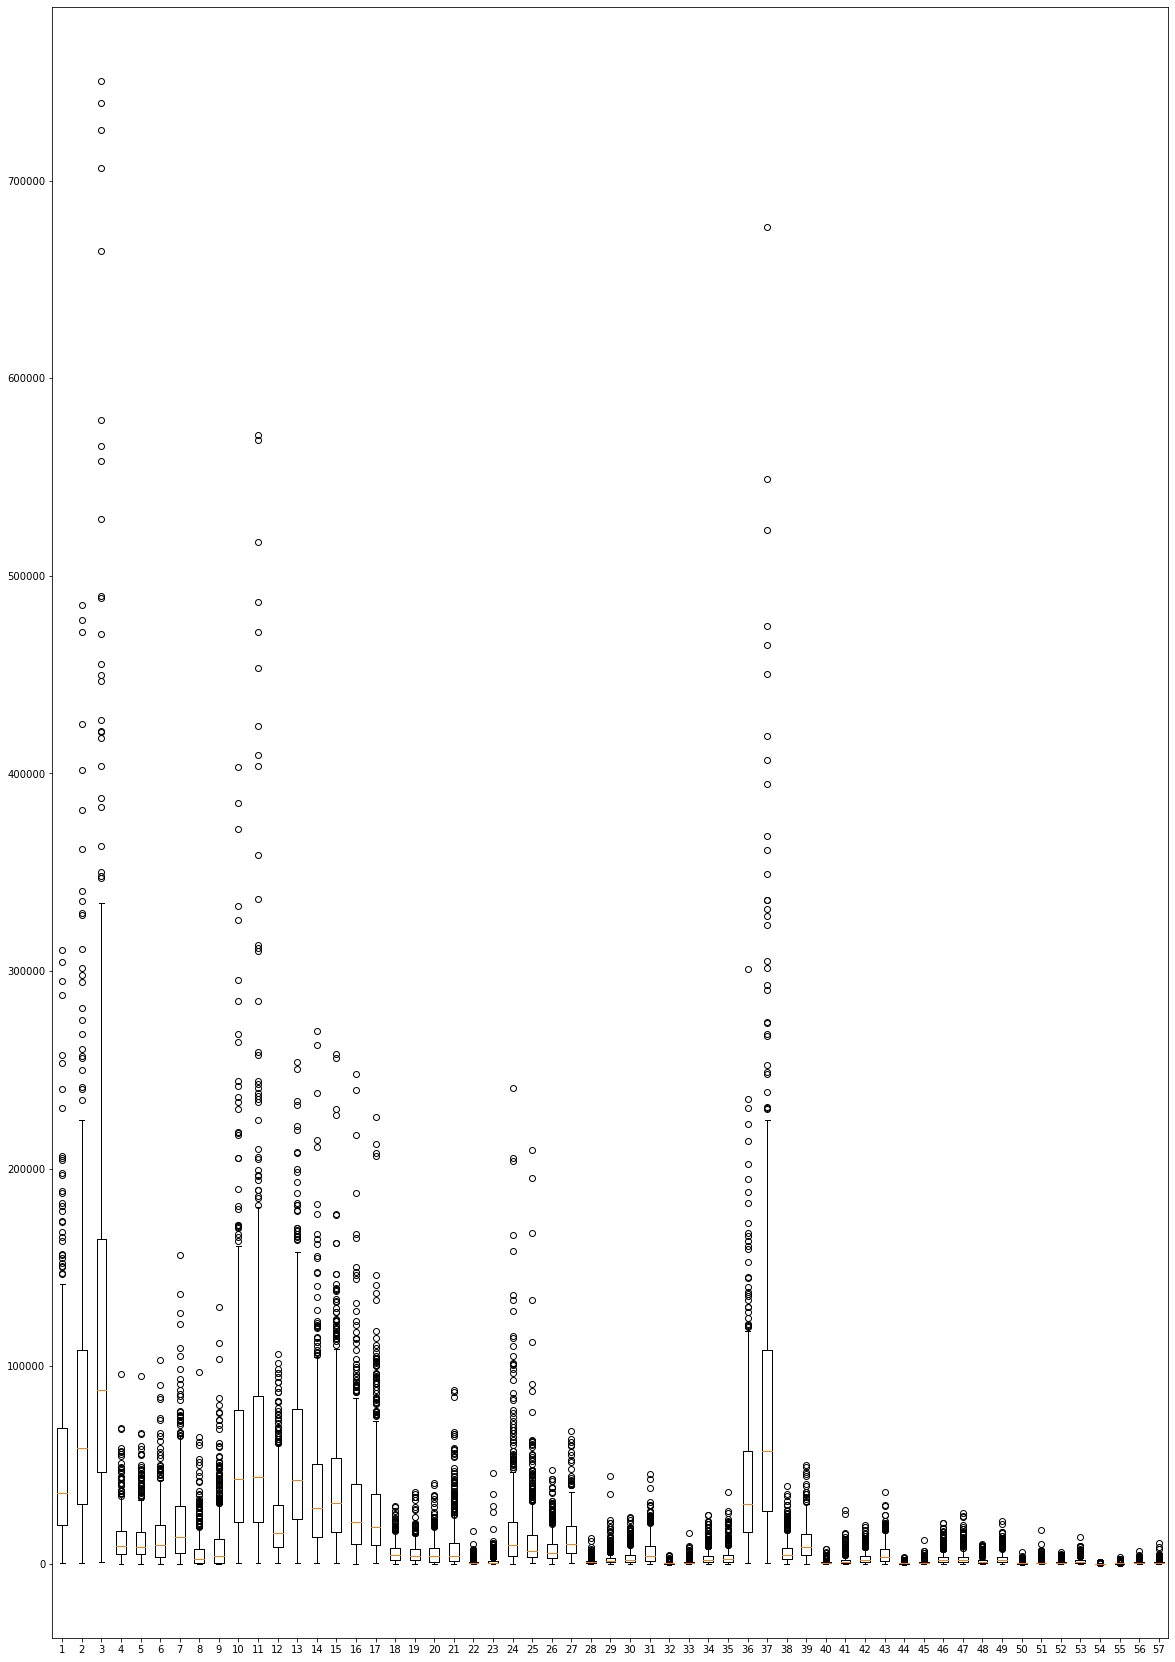

In [94]:
plt.figure(figsize =(20,30))
plt.boxplot(df_pca)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbc3b9e6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbc3b9ed60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbc3b9e340>,
 'medians': [<matplotlib.lines.Line2D at 0x1bbc3bb1460>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bbc3bb17c0>,
 'means': []}

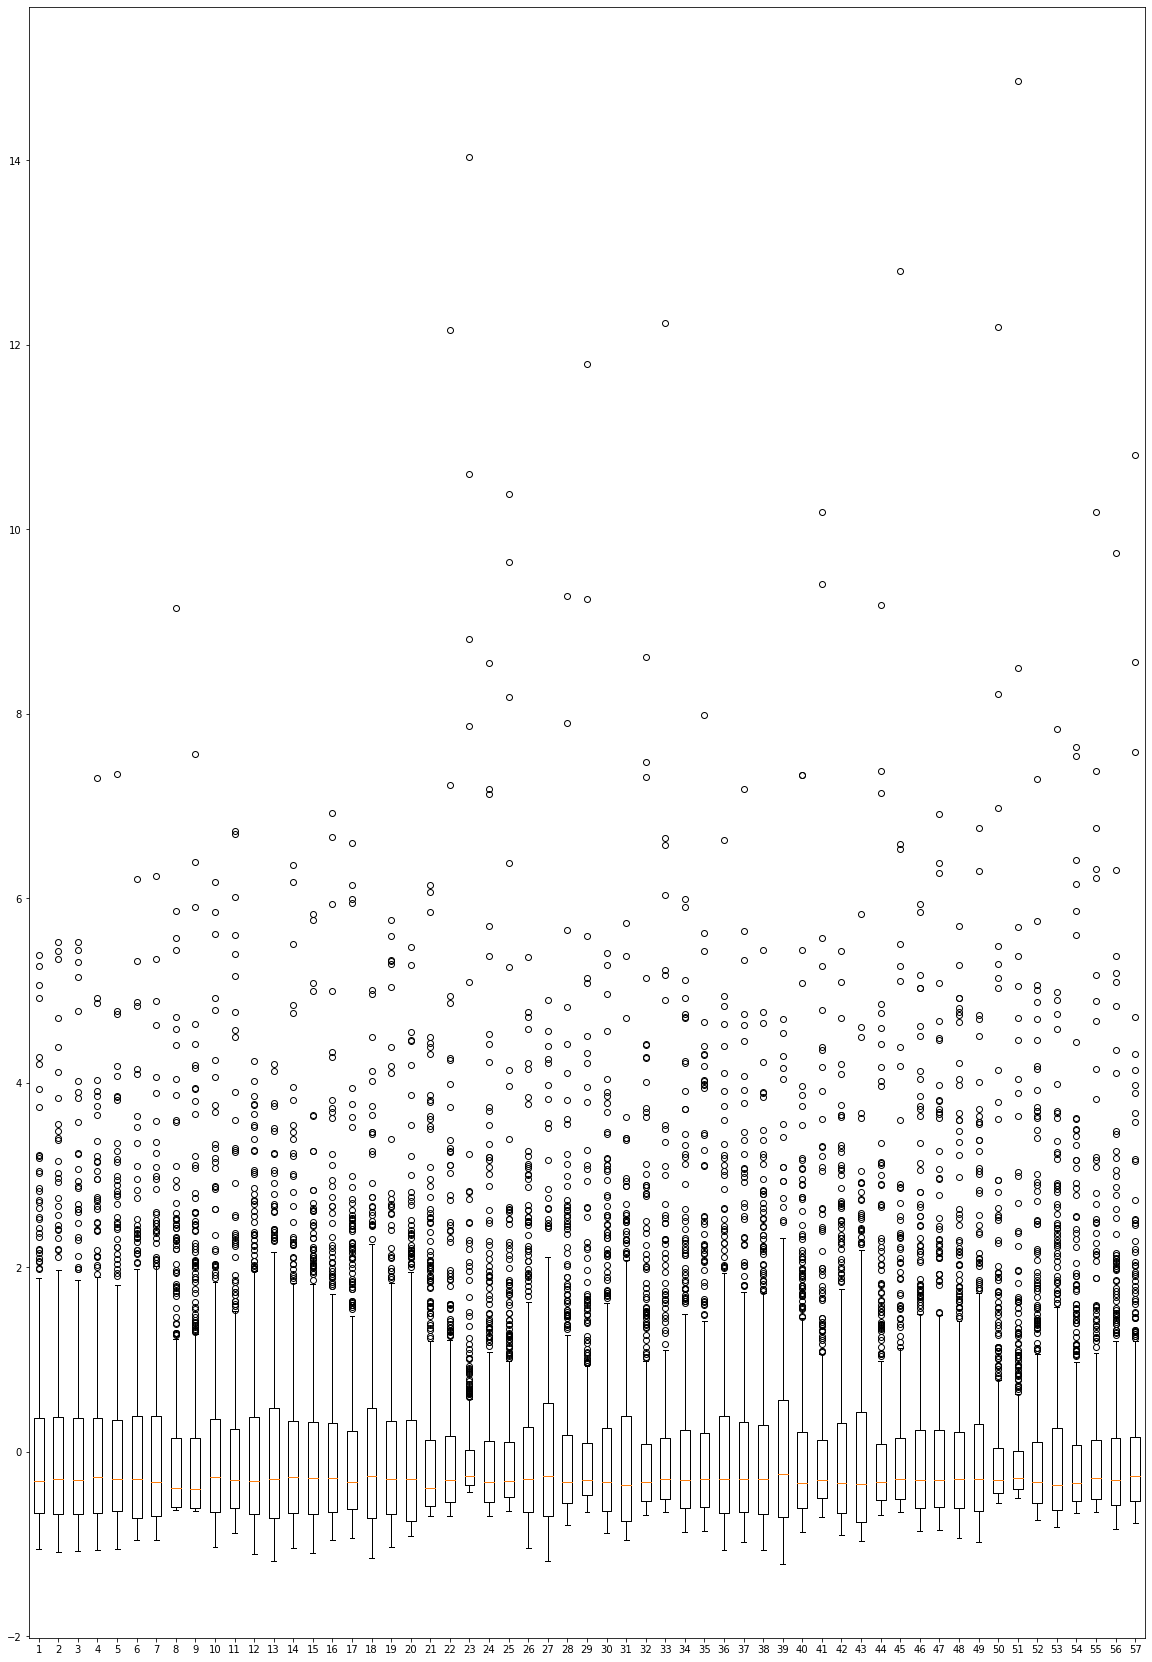

In [95]:
plt.figure(figsize =(20,30))
plt.boxplot(df_pca_scaled)

###### After scaling using Z score it Handles outliers, but does not produce normalized data with the exact same scale.

## Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [96]:
cov_matrix = np.cov(df_pca_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00156495 0.91760364 0.97210871 ... 0.53769433 0.76357722 0.73684378]
 [0.91760364 1.00156495 0.98417823 ... 0.5891007  0.84621844 0.71718181]
 [0.97210871 0.98417823 1.00156495 ... 0.572748   0.82894851 0.74775097]
 ...
 [0.53769433 0.5891007  0.572748   ... 1.00156495 0.61052325 0.52191235]
 [0.76357722 0.84621844 0.82894851 ... 0.61052325 1.00156495 0.88228018]
 [0.73684378 0.71718181 0.74775097 ... 0.52191235 0.88228018 1.00156495]]


In [97]:
df_pca_scaled.cov()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.001565,0.917604,0.972109,0.798807,0.797619,0.776522,0.825137,0.149861,0.165361,0.933397,...,0.557813,0.556412,0.067531,0.046200,0.369168,0.418100,0.487508,0.537694,0.763577,0.736844
TOT_M,0.917604,1.001565,0.984178,0.952313,0.949275,0.841240,0.827592,0.091565,0.086315,0.990860,...,0.699403,0.596628,0.167666,0.115761,0.496704,0.441049,0.652624,0.589101,0.846218,0.717182
TOT_F,0.972109,0.984178,1.001565,0.909396,0.907975,0.818238,0.834059,0.123819,0.128848,0.986983,...,0.656373,0.599888,0.138980,0.099593,0.451717,0.443825,0.594735,0.572748,0.828949,0.747751
M_06,0.798807,0.952313,0.909396,1.001565,0.999713,0.782342,0.748700,0.055361,0.044017,0.914186,...,0.761800,0.648011,0.267091,0.198649,0.602031,0.514860,0.691682,0.565914,0.786189,0.652162
F_06,0.797619,0.949275,0.907975,0.999713,1.001565,0.774345,0.742846,0.065240,0.054748,0.909062,...,0.764809,0.650851,0.259074,0.189865,0.612525,0.524089,0.699729,0.575077,0.784954,0.652458
M_SC,0.776522,0.841240,0.818238,0.782342,0.774345,1.001565,0.986612,-0.045738,-0.047900,0.819765,...,0.674687,0.570470,0.184620,0.129953,0.524269,0.462621,0.665958,0.592362,0.736550,0.580927
F_SC,0.825137,0.827592,0.834059,0.748700,0.742846,0.986612,1.001565,-0.014144,-0.009204,0.815424,...,0.651473,0.586607,0.163683,0.116410,0.508801,0.489422,0.629453,0.590268,0.721226,0.601028
M_ST,0.149861,0.091565,0.123819,0.055361,0.065240,-0.045738,-0.014144,1.001565,0.989593,0.090682,...,0.123160,0.196878,0.027262,0.007088,0.126534,0.239186,-0.005491,0.090264,0.123178,0.147184
F_ST,0.165361,0.086315,0.128848,0.044017,0.054748,-0.047900,-0.009204,0.989593,1.001565,0.087512,...,0.121601,0.217081,0.017232,0.002560,0.136610,0.273735,-0.005889,0.100140,0.114309,0.151105
M_LIT,0.933397,0.990860,0.986983,0.914186,0.909062,0.819765,0.815424,0.090682,0.087512,1.001565,...,0.653528,0.560942,0.144292,0.101514,0.422422,0.382324,0.601059,0.553235,0.853533,0.739827


In [112]:
from statsmodels.multivariate.pca import PCA

In [113]:
pc = PCA(df_pca_scaled,
         standardize=True,  
         normalize=True,    
         missing=None,
         method='eig')

C:\Users\SHIKHA ANAND\anaconda3\lib\site-packages\statsmodels\multivariate\pca.py:556: EstimationWarning: Only 44 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  warnings.warn('Only {num:d} eigenvalues are positive.  '


In [114]:
eig_vecs = pc.eigenvecs

In [115]:
print('Eigen Vectors \n')
eig_vecs

Eigen Vectors 



,eigenvec_00,eigenvec_01,eigenvec_02,eigenvec_03,eigenvec_04,eigenvec_05,eigenvec_06,eigenvec_07,eigenvec_08,eigenvec_09,...,eigenvec_34,eigenvec_35,eigenvec_36,eigenvec_37,eigenvec_38,eigenvec_39,eigenvec_40,eigenvec_41,eigenvec_42,eigenvec_43
0,0.156021,-0.126347,0.002690,-0.125293,0.007022,-0.004083,0.118110,-0.057238,0.004265,-0.019985,...,0.163095,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.167118,-0.089677,-0.056698,-0.019942,0.033026,0.073389,-0.089554,-0.111431,0.018872,0.024501,...,0.035107,-3.331992e-01,-4.924186e-02,4.615146e-02,9.977686e-04,9.298274e-02,1.332790e-01,6.741624e-02,-4.358331e-03,-2.997242e-02
2,0.165553,-0.104912,-0.038749,-0.070873,0.012847,0.043647,0.002124,-0.088355,0.014911,0.038041,...,-0.042635,6.937335e-02,-2.298622e-01,-7.152963e-02,-2.569010e-03,2.107786e-01,-3.056510e-02,1.391221e-01,1.398645e-01,-3.565697e-02
3,0.162193,-0.022095,-0.057788,0.011917,0.050248,0.157957,-0.165067,-0.169595,-0.056773,0.153574,...,-0.645233,2.436845e-12,1.137433e-12,1.309740e-13,2.776348e-14,-1.687531e-13,-8.467566e-14,-1.577862e-12,2.583723e-14,-3.104668e-13
4,0.162566,-0.020271,-0.050126,0.014844,0.043848,0.154436,-0.169082,-0.169459,-0.059323,0.169567,...,0.610698,-2.431686e-12,-1.125609e-12,-1.267457e-13,8.427817e-16,1.656160e-13,7.551786e-14,1.581664e-12,-2.179805e-14,2.895010e-13
5,0.151358,-0.045111,-0.002569,0.012485,0.173007,0.064295,0.001566,0.129301,0.037480,-0.448517,...,0.276464,-3.657158e-12,-1.740467e-12,-2.264508e-14,4.550426e-14,-6.235810e-14,9.668308e-14,2.404145e-12,8.217775e-14,1.457012e-13
6,0.151567,-0.051924,0.025101,-0.029893,0.159803,0.040518,0.084658,0.144352,0.041232,-0.446968,...,-0.273733,3.679921e-12,1.750731e-12,2.119273e-14,-4.720579e-14,6.456580e-14,-9.567997e-14,-2.417014e-12,-8.235490e-14,-1.452200e-13
7,0.027234,0.027679,0.123504,-0.222247,-0.433163,-0.222591,-0.405505,-0.021982,0.018632,-0.160418,...,0.050429,-6.052381e-13,-2.865514e-13,-1.453308e-14,1.561757e-14,-9.861036e-15,1.492209e-14,3.998091e-13,1.298007e-14,3.384380e-14
8,0.028183,0.030223,0.139769,-0.229754,-0.438792,-0.225531,-0.357800,-0.014873,0.043866,-0.134862,...,-0.050953,6.055087e-13,2.854843e-13,1.463892e-14,-1.495002e-14,1.016288e-14,-1.620405e-14,-4.009544e-13,-1.359676e-14,-3.387763e-14
9,0.161993,-0.115355,-0.082168,-0.035163,0.009101,0.055465,-0.045934,-0.099423,0.045193,0.005752,...,0.065808,3.115877e-01,5.279005e-02,1.938979e-01,-2.063720e-01,-1.437390e-01,2.767469e-02,1.338796e-01,3.824783e-01,-2.102106e-01


In [116]:
eig_vals= np.linalg.eigvals(cov_matrix)
eig_vals

array([ 3.18135647e+01+0.00000000e+00j,  7.86942415e+00+0.00000000e+00j,
        4.15340812e+00+0.00000000e+00j,  3.66879058e+00+0.00000000e+00j,
        2.20652588e+00+0.00000000e+00j,  1.93827502e+00+0.00000000e+00j,
        1.17617374e+00+0.00000000e+00j,  7.51159086e-01+0.00000000e+00j,
        6.17053743e-01+0.00000000e+00j,  5.28300887e-01+0.00000000e+00j,
        4.29831189e-01+0.00000000e+00j,  3.53440201e-01+0.00000000e+00j,
        2.96163013e-01+0.00000000e+00j,  2.81275560e-01+0.00000000e+00j,
        1.92158325e-01+0.00000000e+00j,  1.36267920e-01+0.00000000e+00j,
        1.13389199e-01+0.00000000e+00j,  1.06303946e-01+0.00000000e+00j,
        9.72885376e-02+0.00000000e+00j,  8.01062194e-02+0.00000000e+00j,
        5.76089954e-02+0.00000000e+00j,  4.43955966e-02+0.00000000e+00j,
        3.78910846e-02+0.00000000e+00j,  2.96360194e-02+0.00000000e+00j,
        2.70797618e-02+0.00000000e+00j,  2.34458139e-02+0.00000000e+00j,
        1.45111511e-02+0.00000000e+00j,  7.13559124

In [117]:
# Step 4

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('The variance explained by each of eigen values in order is ',var_exp)

The variance explained by each of eigen values in order is  [(55.726063245483395+0j), (13.784435398867206+0j), (7.275295475037645+0j), (6.426417707902712+0j), (3.86504943854373+0j), (3.395169233122143+0j), (2.060238546173366+0j), (1.3157638603636026+0j), (1.0808589417423964+0j), (0.9253954683322143+0j), (0.7529115396464452+0j), (0.6191016673019896+0j), (0.51877238371138+0j), (0.49269485485278147+0j), (0.3365931194569844+0j), (0.23869298429983013+0j), (0.19861759344696064+0j), (0.18620674680204702+0j), (0.17041495488866482+0j), (0.14031763765002397+0j), (0.10091049360553597+0j), (0.07776531307693456+0j), (0.06637171898685922+0j), (0.05191177735689464+0j), (0.04743412222616297+0j), (0.04106873644998121+0j), (0.025418381435212817+0j), (0.01924221472767968+0j), (0.016316708282405487+0j), (0.014250334150862977+0j), (0.013824860517365098+0j), (0.008803792969803294+0j), (0.004550268241441093+0j), (0.001870578264110183+0j), (0.001249902083203375+0j), (2.8306400391716647e-15+0j), (1.62076581806

In [118]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 55.72606325+0.00000000e+00j  69.51049864+0.00000000e+00j
  76.78579412+0.00000000e+00j  83.21221183+0.00000000e+00j
  87.07726127+0.00000000e+00j  90.4724305 +0.00000000e+00j
  92.53266905+0.00000000e+00j  93.84843291+0.00000000e+00j
  94.92929185+0.00000000e+00j  95.85468732+0.00000000e+00j
  96.60759886+0.00000000e+00j  97.22670052+0.00000000e+00j
  97.74547291+0.00000000e+00j  98.23816776+0.00000000e+00j
  98.57476088+0.00000000e+00j  98.81345386+0.00000000e+00j
  99.01207146+0.00000000e+00j  99.19827821+0.00000000e+00j
  99.36869316+0.00000000e+00j  99.5090108 +0.00000000e+00j
  99.60992129+0.00000000e+00j  99.6876866 +0.00000000e+00j
  99.75405832+0.00000000e+00j  99.8059701 +0.00000000e+00j
  99.85340422+0.00000000e+00j  99.89447296+0.00000000e+00j
  99.91989134+0.00000000e+00j  99.93913356+0.00000000e+00j
  99.95545026+0.00000000e+00j  99.9697006 +0.00000000e+00j
  99.98352546+0.00000000e+00j  99.99232925+0.00000000e+00j
  99.99687952+0.00000000e+

C:\Users\SHIKHA ANAND\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


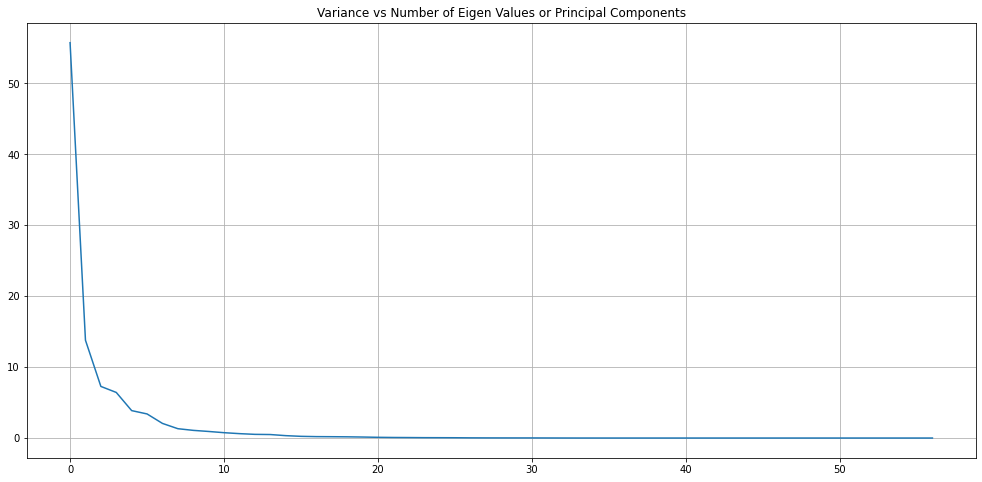

In [119]:
plt.figure(figsize=(17,8))
plt.plot(var_exp)
plt.title('Variance vs Number of Eigen Values or Principal Components')
plt.grid()

In [130]:
print('Eigen Values \n')
pca.explained_variance_

Eigen Values 



array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502])

In [131]:
print('The variance explained by each of eigen values in order is  \n')
pca.explained_variance_ratio_*100

The variance explained by each of eigen values in order is  



array([55.72606325, 13.7844354 ,  7.27529548,  6.42641771,  3.86504944,
        3.39516923])

In [132]:
print("Cumulative Variance Explained /n")
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

Cumulative Variance Explained /n


array([55.7, 69.5, 76.8, 83.2, 87.1, 90.5])

In [133]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [134]:
pca_transformed

array([[-4.61726348,  0.13811585,  0.32854489,  1.54369714,  0.35373623,
        -0.42094803],
       [-4.77166187, -0.10586536,  0.24444895,  1.96321495, -0.15388429,
         0.41730835],
       [-5.96483558, -0.29434689,  0.36739354,  0.61954271,  0.47819913,
         0.27658052],
       ...,
       [-6.294625  , -0.63812665,  0.10748279,  1.36818692,  0.15374528,
         0.14114473],
       [-6.22319199, -0.67231967,  0.27132545,  1.14349288,  0.06043998,
        -0.11568247],
       [-5.89623627, -0.93716953,  0.34921832,  1.114861  ,  0.14910357,
        -0.15454413]])

In [135]:
#Extract eigen vectors
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

## Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

##### The optimum number of PCs is 3, which explains 90% of the variance.

In [139]:
var_exp = pca.explained_variance_ratio_
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169])

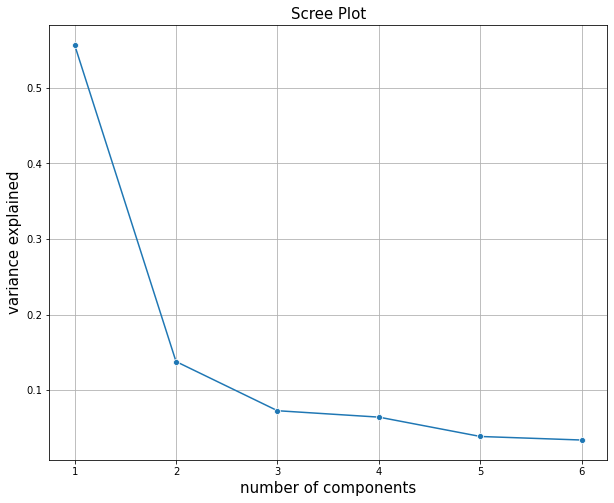

In [140]:
plt.figure(figsize=(10,8))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.grid()
plt.ylabel('variance explained', fontsize=15)
plt.xlabel('number of components', fontsize=15)
plt.title('Scree Plot', fontsize=15)
plt.show()

In [137]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169])

## Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

##### 1. The first PC explains the most variance, with a value of 0.49. This component is a linear combination of the variables No_HH, TOT_M, TOT_F, M_06, and F_06.

##### 2. The second PC explains the second most variance, with a value of 0.24. This component is a linear combination of the variables M_SC, F_SC, M_ST, F_ST, M_LIT, and F_LIT.

##### 3. The third PC explains the third most variance, with a value of 0.17. This component is a linear combination of the variables M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, and MAINWORK_F.

## Write linear equation for first PC.

##### 0.49 * No_HH + 0.49 * TOT_M + 0.49 * TOT_F + 0.49 * M_06 + 0.49 * F_06 = PC1